# Assignment 3 

## Chapter 5

# ex : 3 

(a) Explain how k-fold cross-validation is implemented.

 - in K-Fold cross validation approach set of observations are randomly divided into k groups or folds of equal size.
 - the first fold will be a validation set and the method is fit on the remaining k-1 folds.
 - Mean Squared error MES1 is computed with the first fold  and the same is repeated k times for the number of folds.
 - the k estimates will be MES1, MES2  till MESk
 - Average of all the estimates will be taken to compute the k-fold CV estimate.
 

(b) What are the advantages and disadvantages of k-fold crossvalidation
relative to:
(i) The validation set approach?
(ii). LOOCV?

- Validation Set approach is highly variable and comapred to it k-fold is much better but latency is more in Kfold
- LOOCV is computationally intensive for larger data hence for smaller samples it might be better

# ex: 8 

In this data set, what is n and what is p? Write out the model
used to generate the data in equation form.

In [2]:
#part a
set.seed(1)
x <- rnorm(100)
y <- x - 2*x^2 + rnorm(100)

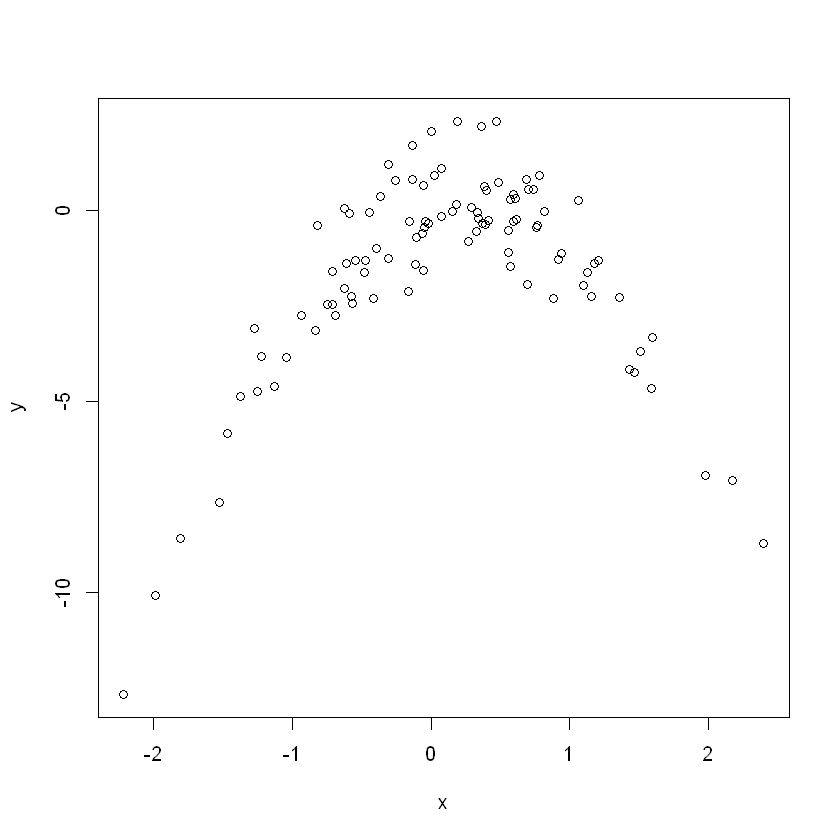

In [3]:
# part b 
plot(x,y)

 
(c) Set a random seed, and then compute the LOOCV errors that
result from fitting the following four models using least squares:

In [14]:
library(boot)
data <- data.frame(x,y)
loocv_err <- list()
set.seed(42)
for (i in 1:4) {
    glm.fit  <- glm(y ~ poly(x,i),data = data)
    cv.err <- cv.glm(data ,glm.fit)
    
    loocv_err[i] <- cv.err$delta[1]
}
loocv_err

[[1]]
[1] 7.288162

[[2]]
[1] 0.9374236

[[3]]
[1] 0.9566218

[[4]]
[1] 0.9539049

(d) Repeat (c) using another random seed, and report your results.
Are your results the same as what you got in (c)? Why?

In [15]:
library(boot)
data <- data.frame(x,y)
loocv_err <- list()
set.seed(43)
for (i in 1:4) {
    glm.fit  <- glm(y ~ poly(x,i),data = data)
    cv.err <- cv.glm(data ,glm.fit)
    
    loocv_err[i] <- cv.err$delta[1]
}
loocv_err

#Results are almost identical in both the cases 

[[1]]
[1] 7.288162

[[2]]
[1] 0.9374236

[[3]]
[1] 0.9566218

[[4]]
[1] 0.9539049

(e) Which of the models in (c) had the smallest LOOCV error? Is
this what you expected? Explain your answer.

- The Second Polynomial has the smallest LOOCV as its a polynomial with degree 2

(f) Comment on the statistical significance of the coefficient estimates
that results from fitting each of the models in (c) using
least squares. Do these results agree with the conclusions drawn
based on the cross-validation results?

In [16]:
summary(glm.fit)


Call:
glm(formula = y ~ poly(x, i), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0550  -0.6212  -0.1567   0.5952   2.2267  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.55002    0.09591 -16.162  < 2e-16 ***
poly(x, i)1   6.18883    0.95905   6.453 4.59e-09 ***
poly(x, i)2 -23.94830    0.95905 -24.971  < 2e-16 ***
poly(x, i)3   0.26411    0.95905   0.275    0.784    
poly(x, i)4   1.25710    0.95905   1.311    0.193    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.9197797)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  87.379  on 95  degrees of freedom
AIC: 282.3

Number of Fisher Scoring iterations: 2


- polynomial of defgree 1 and 2 are quite significant.

# Chapter 6

# Ex: 1
#a)
-  Best subset selection has the smallest training RSS

#b)
-  its uncertain to select which model has the smallest RSS

#c) 
i)   T
ii)  T
iii) F
iv)  F
v)   F

# Ex : 9

In [21]:
library(ISLR)
data(College)
set.seed(42)

train = sample(1:dim(College)[1], dim(College)[1]/2)
test <- -train
train_df <- College[train,]
test_df <- College[test,]

In [22]:
#b) 

lm.fit <- lm(Apps ~ ., data = train_df)
lm_pred <- predict(lm.fit,test_df)
mean((lm_pred - test_df$Apps)^2)

[1] 1341776

In [24]:
#c) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained

library("glmnet")
train <- model.matrix(Apps ~ ., data = train_df)
test <- model.matrix(Apps ~ ., data = test_df)

grid <- 10 ^seq(4 , -2 , length = 100)
ridge <- glmnet(train ,train_df$Apps , alpha = 0 , lambda =  grid, thresh =  1e-12)
ridge_cv <- cv.glmnet(train,train_df$Apps, alpha = 0, lambda = grid , thresh = 1e-12)

#best lambda by cv

lambda_best <- ridge_cv$lambda.min

#
ridge_pred <- predict(ridge, s = lambda_best ,newx = test)
mean((ridge_pred - test_df$Apps)^2)


Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] 1462449

In [25]:
#d  - LASSO
lasso <- glmnet(train ,train_df$Apps , alpha = 1 , lambda =  grid, thresh =  1e-12)
lasso_cv <- cv.glmnet(train,train_df$Apps, alpha = 1, lambda = grid , thresh = 1e-12)

#best lambda by cv

lambda_best <- lasso_cv$lambda.min

#
lasso_pred <- predict(lasso, s = lambda_best ,newx = test)
mean((lasso_pred - test_df$Apps)^2)


[1] 1410193


(e) Fit a PCR model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value
of M selected by cross-validation

[1] 2802274

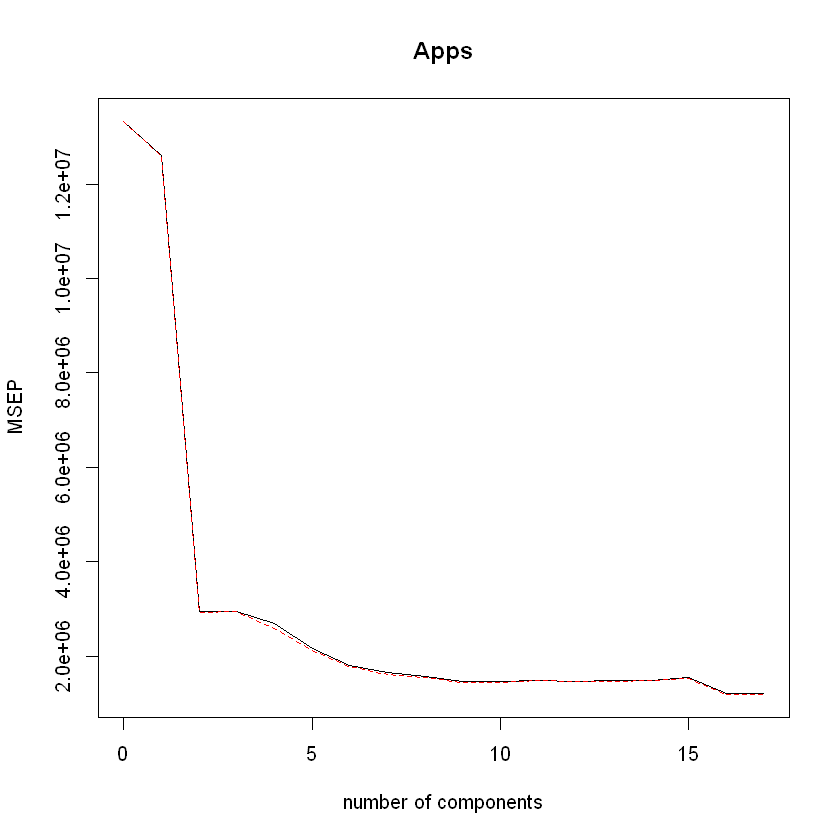

In [27]:
library("pls")
pcr <- pcr(Apps ~ ., data = train_df , scale = TRUE ,validation ="CV")
validationplot(pcr , val.type = 'MSEP')
pcr_pred  <- predict(pcr , test_df , ncomp = 10)
mean((pcr_pred - test_df$Apps)^2)

(f) Fit a PLS model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value
of M selected by cross-validation.

[1] 1539489

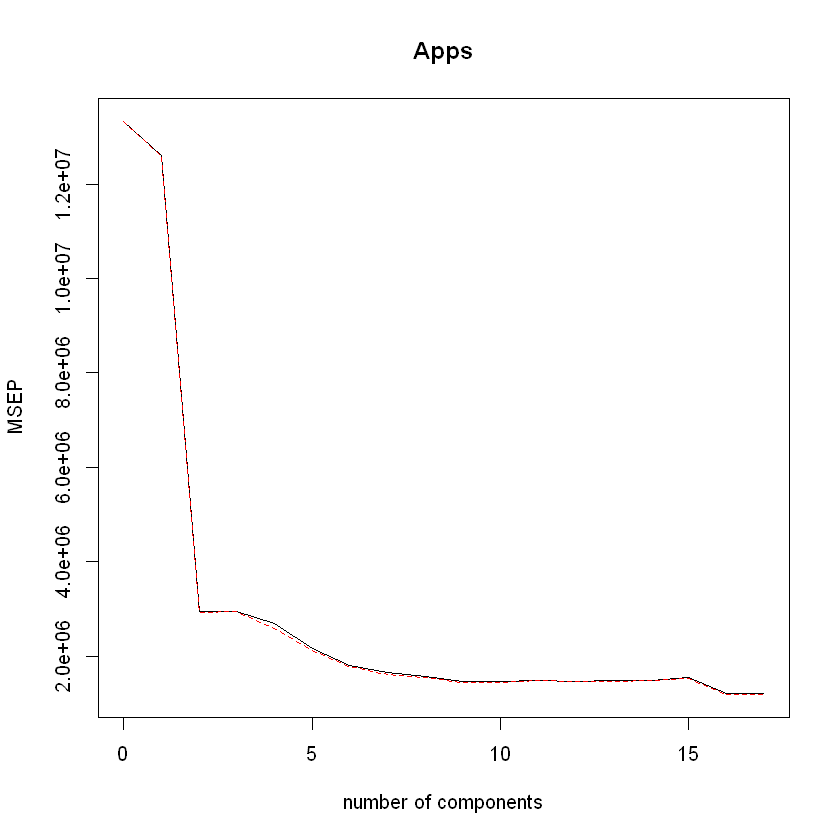

In [30]:
pls <- plsr(Apps ~ ., data = train_df , scale = TRUE ,validation ="CV")
validationplot(pcr , val.type = 'MSEP')
pls_pred  <- predict(pls , test_df , ncomp = 6)
mean((pls_pred - test_df$Apps)^2)